#  Investigate a Dataset - [Patients no-show appointments_may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Question for Analysis
we will try to understand What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [14]:
# import all packages that i plan to use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
in this section of the report, we will load in the data, check for cleanliness, anc then trim and clean dataset for analysis  

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# exploring the size of our dataframe
df.shape

(110527, 14)

data consist of 110527 rows and 14 columns

In [17]:
#inspect our data type,look for instances of missing data and check for duplication
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

No missing data and no identical dublication of rows

In [18]:
#check the number of duplicated patients Ids.
df['PatientId'].duplicated().sum()

48228

there is 48228 duplicated ID

In [20]:
#check the number of duplicated patients Ids and Noshow.
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patients ids have same status of showing or noshowing up at the clinic

In [21]:
#get some information about data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


● mean age is 37. 

● max age is 115.

● min age is -1 which is mistake.

● about 50% of ages are between 18 and 55 years old 
about 25% received SMS Majority doesn't have chronic diseases
majority are not handcapped.

In [22]:
mask = df.query('Age == "-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I will remove it as it is only single value it will not effect our analysis


### Data Cleaning

In [23]:
# removing the -1 value for the age
df.drop(df[df['Age']==-1].index, inplace = True)

In [24]:
#remove duplicated IDs with duplicated showing or no showing status
#leaving the duplicated ids if they differ in the showing status
df.drop_duplicates(['PatientId','No-show'],inplace = True)
df.shape

(71816, 14)

In [25]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [26]:
#correction our columns names
df.rename(columns= {'No-show':'No_show'},inplace = True)
df.rename(columns= {'Hipertension':'Hypertension'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [27]:
# remove unneccessary data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1 ,inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data wrangling summary 
after gathering the data from the csv file we explored the first few rows of the data set to the list general properities .then we showed the dimentions of our data ,then check if there were any duplicated appointments ,then explored if there was duplicated pationts IDs with same show status and removed them , then we turned to data informations like data types and if there is any missing data to handle , then we saw some statistics about our data like (min,max,mean,etc) and finally we cleaned our data by correcting the column names and droping the unnecessary informations.

<a id='eda'></a>
## Exploratory Data Analysis
now we ready to exploration(assessing). computing statistics and creating visualizations with the goal of addressing the research questions that posed in the introduction section. 

### general look on our data

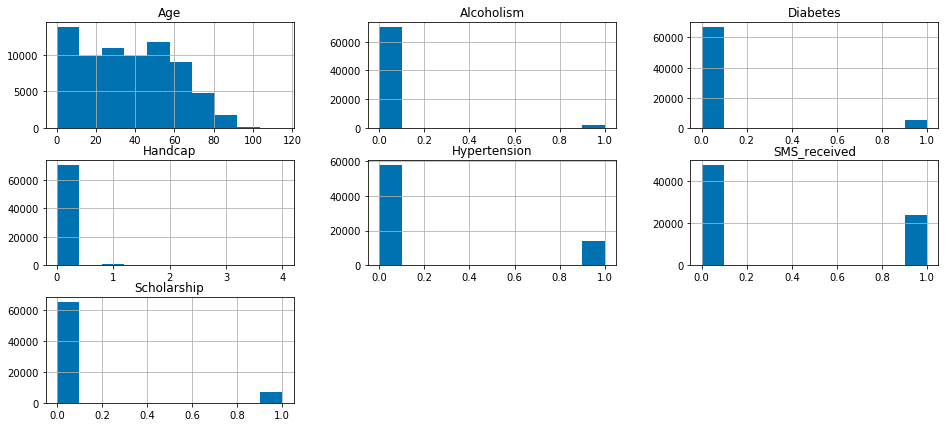

In [28]:
# general look on our data through histgram plot

plt.style.use('seaborn-colorblind') 
df.hist(figsize = (16,7))
plt.show()

● most of the patients did't suffer from chronic diseases and handicapped.

● about 18% suffered from hypertension. 

● number of patients who receieved SMS is half the number of those who didn't.

● about 9% are enrolled in the Barsilian welfare program.

In [29]:
#dividing the patients into 2 groups according to showing or not then exploring them

show =df.No_show == 'No'
noshow =df.No_show == 'Yes'
df[show].count().No_show,df[noshow].count().No_show


(54153, 17663)

Number of showed patients is 54153  3 times greater than Noshowed 17663

In [30]:
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patient is 37 , no showed is 34 showed patients recieved sms less than show patients This means we need to revise our SMS compaghine

### Investigation for the influencing factors on the attendance rate

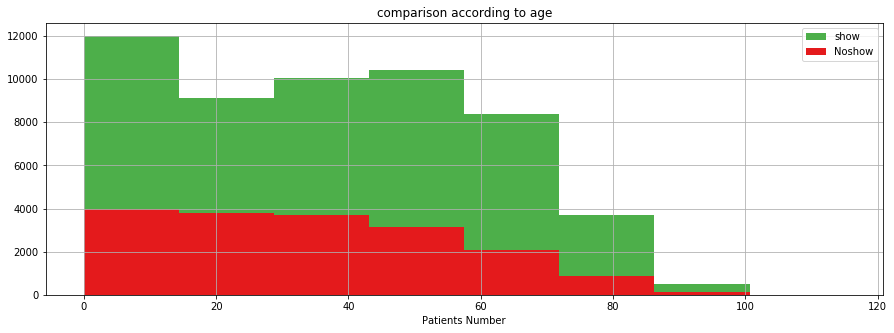

In [31]:
# Does age affect the attendance of patients?

def Attendance(df,col_name,attended , absent):
    plt.figure(figsize=[15,5])
    df[col_name][show].hist(bins=8,color='#4daf4a',label='show')
    df[col_name][noshow].hist(bins=8,color='#e41a1c',label='Noshow')
    plt.legend()
    plt.title('comparison according to age')
    plt.xlabel('Age')
    plt.xlabel('Patients Number')
    plt.show()
    
Attendance(df,'Age',show,noshow)    

● Patients in the ages from 0:10 are the most attendance ((parents takign care of their children)than from 45:55.

● the least attending are whom above 65 years old.

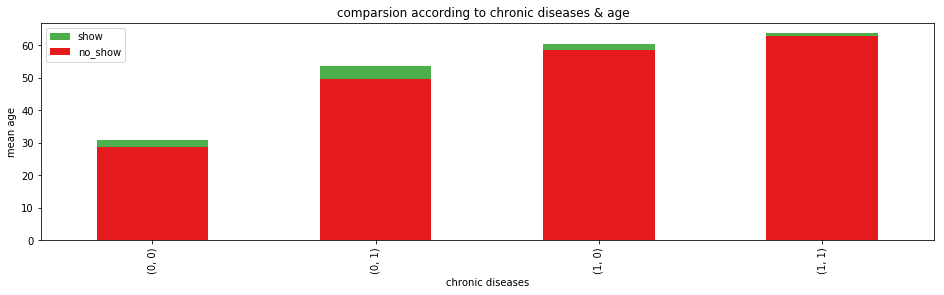

In [33]:
# Does age and chronic diseases affect the attendence? 

plt.figure(figsize=[16,4]) # to setting the figure size
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color ='#4daf4a',label='show')
df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color ='#e41a1c',label='no_show')
plt.legend()
plt.title('comparsion according to chronic diseases & age  ')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')
plt.show()

In [34]:
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean(),df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean()

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing patients is 31 and non showing is 28, mean age of Hypertensive diabetic showing patients is around 64 and non showing is about 63 which means that there is a correlation between age and chronic diseases, and no correlation between chronic diseases and attending  

Does gender affect the attendence?

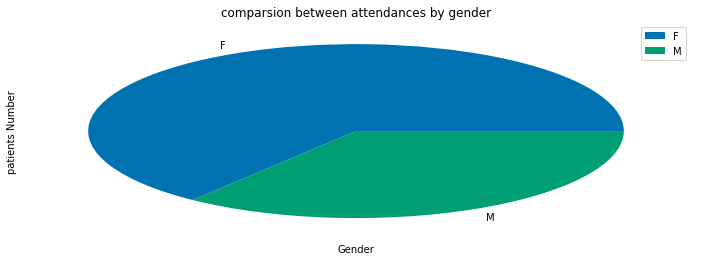

In [39]:
# what is the percentage of sexes attending ?

plt.figure(figsize=[12,4])
df['Gender'][show].value_counts(normalize=True).plot(kind='pie',label='show')
plt.legend()
plt.title('comparsion between attendances by gender')
plt.xlabel('Gender')
plt.ylabel('patients Number')
plt.show()

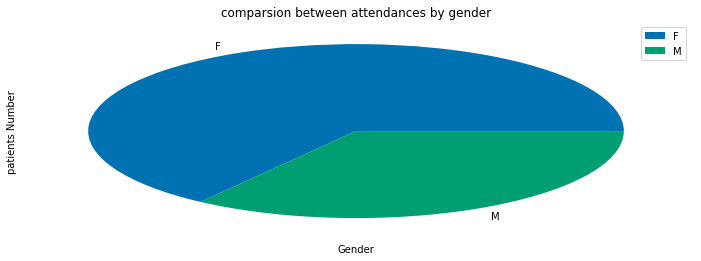

In [40]:
#what is the percentage of sexes absent ?

plt.figure(figsize=[12,4])
df['Gender'][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
plt.legend()
plt.title('comparsion between attendances by gender')
plt.xlabel('Gender')
plt.ylabel('patients Number')
plt.show()

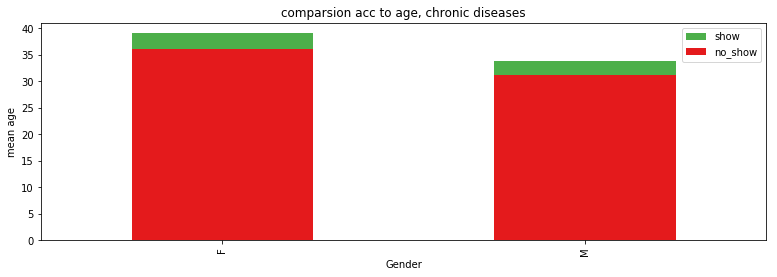

In [41]:
#Does age and gender affect the attendence together?

plt.figure(figsize=[13,4])
df[show].groupby('Gender')['Age'].mean().plot(kind='bar',color='#4daf4a',label='show')
df[noshow].groupby('Gender')['Age'].mean().plot(kind='bar',color='#e41a1c',label='no_show')
plt.legend()
plt.title('comparsion acc to age, chronic diseases')
plt.xlabel('Gender')
plt.ylabel('mean age')
plt.show()

In [42]:
print(df[show].groupby('Gender')['Age'].mean(),df[noshow].groupby('Gender')['Age'].mean())
df[show].groupby('Gender')['Age'].median(),df[noshow].groupby('Gender')['Age'].median()

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64


(Gender
 F    39
 M    32
 Name: Age, dtype: int64, Gender
 F    34
 M    29
 Name: Age, dtype: int64)

● there is no correlation between age and gender affecting the show rate

● the mean and the median of sexes ages are almost the same

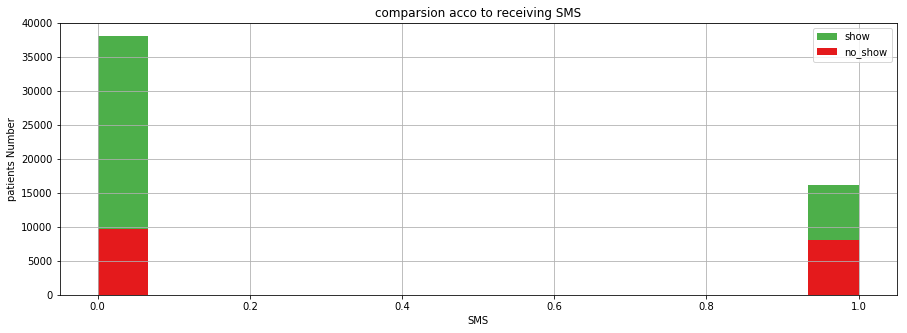

In [43]:
#Does receiving SMS affect the attendence?

plt.figure(figsize=[15,5])
df['SMS_received'][show].hist(bins=15,color='#4daf4a',label= 'show')
df['SMS_received'][noshow].hist(bins=15,color='#e41a1c',label= 'no_show')
plt.legend()
plt.title('comparsion acco to receiving SMS')
plt.xlabel('SMS')
plt.ylabel('patients Number')
plt.show()

Number of showing patients without receiving SMS is greater than showing patients with receiving SMS, This means we need to revise our SMS compaghine

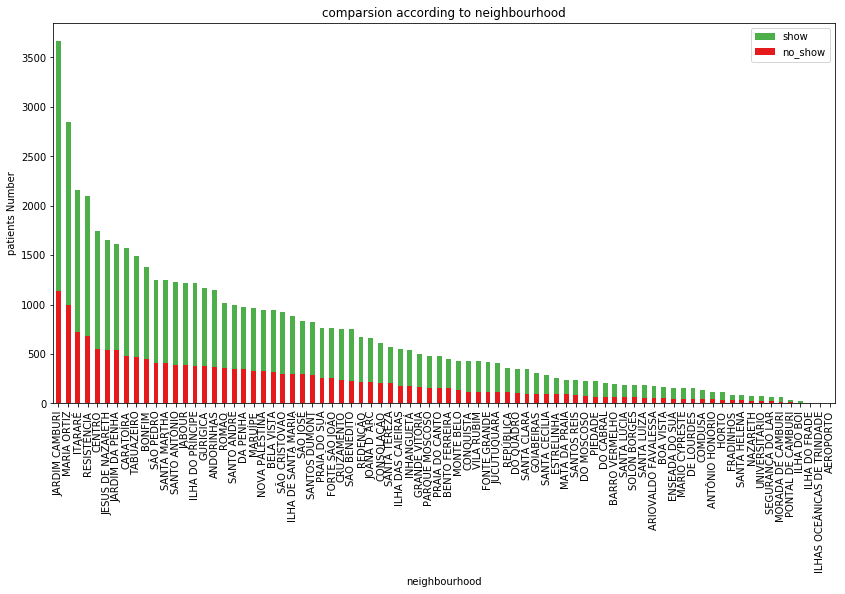

In [44]:
#Does neighbourhood affect the attendance ?

plt.figure(figsize=[14,7])
df['Neighbourhood'][show].value_counts().plot(kind='bar',color='#4daf4a',label= 'show')
df['Neighbourhood'][noshow].value_counts().plot(kind='bar',color='#e41a1c',label= 'no_show')
plt.legend()
plt.title('comparsion according to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('patients Number')
plt.show()

Neighbourhood has great effect on attendence or not , JARDIM CAMBURI has the greates number of patients and also has the greatest showing rate

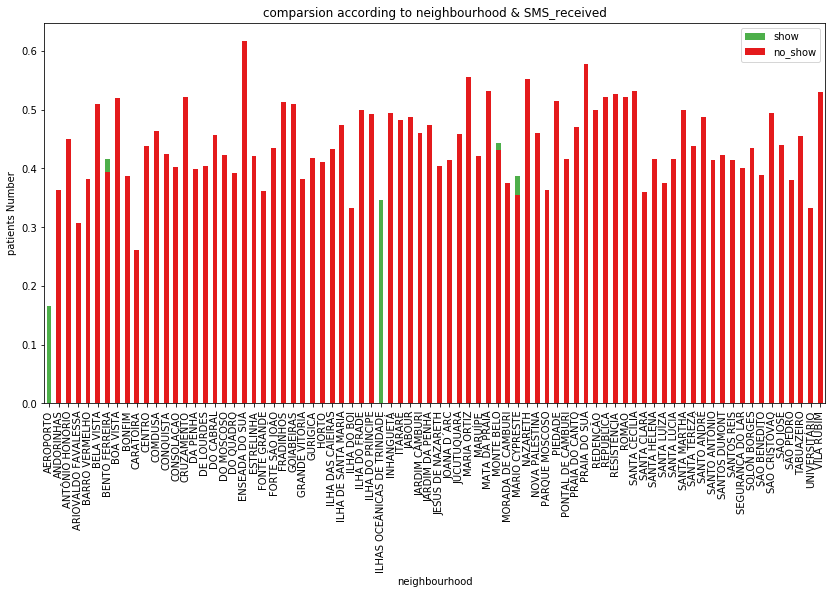

In [45]:
plt.figure(figsize=[14,7])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='#4daf4a',label= 'show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='#e41a1c',label= 'no_show')
plt.legend()
plt.title('comparsion according to neighbourhood & SMS_received')
plt.xlabel('neighbourhood')
plt.ylabel('patients Number')
plt.show()

SMS has rsponse in only 5 neighbourhoods, (ILHAS OCEANICAS DE TRINDADE) is the most responsive neghbouhood to sms ,(ENSEADA DO SUA) is the most SMS_received but not responsive so we need to revise our sms to this neighbourhood

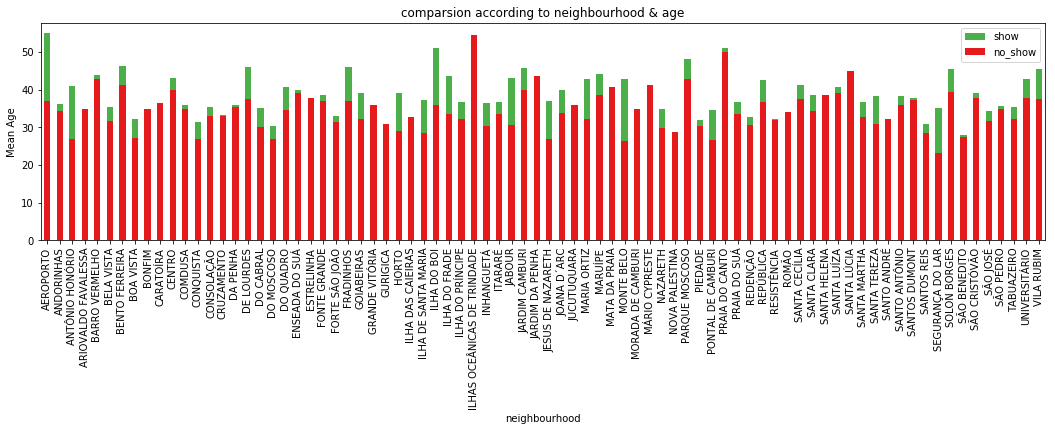

In [46]:
plt.figure(figsize=[18,4])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='#4daf4a',label= 'show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='#e41a1c',label= 'no_show')
plt.legend()
plt.title('comparsion according to neighbourhood & age')
plt.xlabel('neighbourhood')
plt.ylabel('Mean Age')
plt.show()

Patients attendance from specific neighbourhood differ according to ages, AEROPORTO then iLHAS DO BOI are with high ages attendance

<a id='conclusions'></a>
## Conclusions
● At the end, I can say that Neighbourhood has a great effect on attendence of patients, JARDIM CAMBURI has the greates number of patinets and also has the greates showing rate number of showing patients from specifice neighbourhood affected by receiving SMS and Ages.

● Age has a vlear influence on the showing rate Ages from 0:8 are the most showing (parents taking care of their kids) followed by the age group 35-70

● it sounds strange, more people showed without receiving SMS!
## Limitations
No clear correlation between showing and gender ,chronic ,diseases,enrollement in the welfare program

## Submitting your Project 

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0